## Random Forest
---

### Random Forest (Decision Tree Ensemble)

### Mathematical Elements

#### Step 1: Load libraries

In [5]:
# Libraries for Data Manipulation
import pandas as pd
import matplotlib.pyplot as plt

# Import custom functions
import estimate as es

# Sklearn's Random Forests
from sklearn.ensemble import RandomForestClassifier

# This will print entire output of the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Step 2: Loading features and labels
* Load as numpy-array for easier computation

In [2]:
# Loading training data
train_features = pd.read_csv("../DataPrep/training_features.csv").values
train_labels = pd.read_csv("../DataPrep/training_labels.csv").values

# Loading testing data
test_features = pd.read_csv("../DataPrep/testing_features.csv").values
test_labels = pd.read_csv("../DataPrep/testing_labels.csv").values

#### Step 3: Fitting the model
* Making object as ```clf``` for fitting the model on training data
* Citeria for splitting is ```Entropy```
* Specified random state for reproducibility

In [63]:
# Making Object
clf = RandomForestClassifier(criterion="entropy", random_state=1234,  n_estimators=250)

# Fitting on the training data
clf.fit(train_features, train_labels)

<ipython-input-63-75056957baca>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_features, train_labels)


RandomForestClassifier(criterion='entropy', n_estimators=250, random_state=123)

#### Step 4: Making predictions
* Predcted the labels for test features using ```predict()``` method

In [64]:
# Predicting labels of the test data
predictions = clf.predict(test_features)

# Predictions
print("Predicted labels are as follows-")
predictions

Predicted labels are as follows-


array(['Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Case', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control'], dtype=object)

#### Step 5: Performance Estimation
* Using custom function ```estimate()```
* ```estimate()``` accepts the actual labels and predicted labels
* Produces performance parameters and confusion matrix with ```seaborn``` and ```confusion_matrix```

Accuracy: 52.38095238095239
Specificity: 55.00000000000001
Senstivity: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: nan


/home/sirius/TF/spriyanshGit/genoMI/BinaryClassifiers/estimate.py:42: RuntimeWarning: invalid value encountered in double_scalars
  print("F1 Score: " + str(2*((pre * rec)/(pre + rec))))


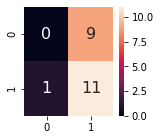

In [65]:
# Passing actual labels and predicted labels
es.estimate(test_labels, predictions)

#### Step 6: Plotting learning curves
* Using custom function ```plot_learning_curve()```
* ```plot_learning_curve()``` takes the following arguments
1. Model
2. Plot title
3. Training Features
4. Training Labels

<module 'matplotlib.pyplot' from '/home/sirius/anaconda3/envs/tf/lib/python3.8/site-packages/matplotlib/pyplot.py'>

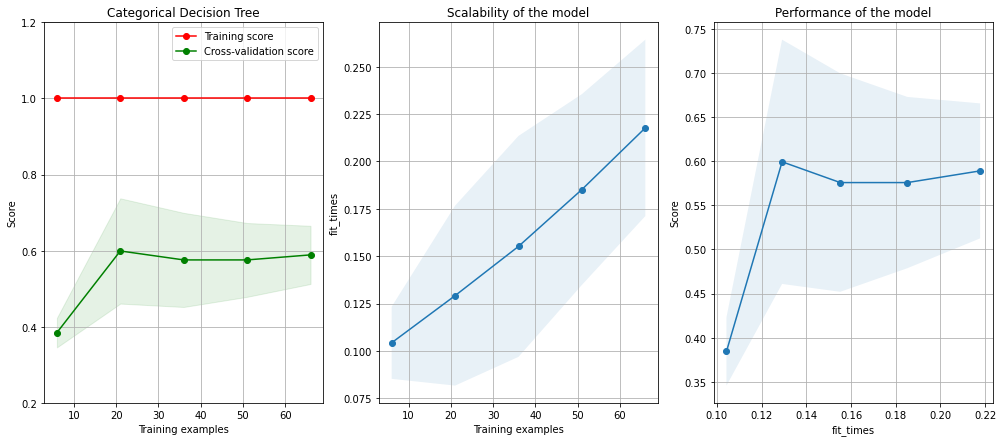

In [28]:
# Graph matrix and size
fig, axes = plt.subplots(1, 3, figsize=(17, 7))

# Passing to plots_learning_curve()
es.plot_learning_curve(clf, "Categorical Decision Tree", train_features, train_labels, axes=axes[:, ], ylim=(0.2, 1.2),
                    cv=None, n_jobs=4)
# Showing the plot
plt.show()

---

In [30]:
#Sample frames
xf = pd.DataFrame(train_features).iloc[0:5,0:3].values
xl = pd.DataFrame(train_labels).iloc[0:5,:].values
yf = pd.DataFrame(test_features).iloc[0:2,0:3].values
yl = pd.DataFrame(test_labels).iloc[0:2,:].values
xf, xl, yf, yl

(array([[  1,   0,  38],
        [  0,   7, 374],
        [  1,   6, 572],
        [  0,   2, 538],
        [ 33,   5, 860]]),
 array([['Case'],
        ['Case'],
        ['Case'],
        ['Control'],
        ['Control']], dtype=object),
 array([[  1,   6, 394],
        [ 13,   4, 777]]),
 array([['Case'],
        ['Control']], dtype=object))

DecisionTreeClassifier(criterion='entropy', random_state=1234)

Predicted labels are as follows-


array(['Case', 'Control'], dtype=object)

Accuracy: 100.0
Specificity: 100.0
Senstivity: 100.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


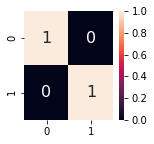

In [34]:
# Making Object
clf = tree.DecisionTreeClassifier(criterion = "entropy", random_state=1234)

# Fitting on the training data
clf.fit(xf, xl)

# Predicting labels of the test data
predictions = clf.predict(yf)

# Predictions
print("Predicted labels are as follows-")
predictions

# Passing actual labels and predicted labels
es.estimate(yl, predictions)